**It contains information related to direct marketing campaigns conducted by a Portuguese banking institution.
--The goal of using this dataset is often to build a predictive model that can accurately predict whether a client will subscribe to a term deposit based on the available attributes.**

In [9]:
#supervised-----we have regression,classification.
#for regression --we have algorithms
#     1)RFR
#     2)DTR
#     3)LINEAR REGRESSION
#for classification---we have algorithms
#     1)RFC
#     2)DTR
#      3)LOGISTIC

In [10]:
#LOGISCTIC REGRESSION--checks the relationship btwn 
#independent features and dependent features.
#we dont get straignt line here becoz it works based on probabilities.
#probability is high then prediction high if probab is low predic is also low
#0.5 is default benchmark if >0.5 then changes to 1 if <0.5 then changes to 0.

In [11]:
#the real purpose of logistic is used for binary classification.
#we also use in multiple classification but logistic
#doesn't give optimal prediction.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [13]:
df = pd.read_csv("bank-additional-full.csv", sep = ';')

In [14]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41194,74.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41195,74.0,NaN,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41196,74.0,retired,married,NaN,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# probelm stmt
above is the details of customers of bank with name xyz bank have launched a 
new service in the bank(eg.bank loan,bussiness loan,home loan etcc).


AIM:build a classification model that can predict whether the customer will 
choose the service or not

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

In [22]:
#EDA--exploratary data analysis

In [23]:
df.isnull().sum() #checking the null values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [24]:
df.isnull().sum().sum()

0

In [25]:
#if the null values are <10 drop them
#else
# if the null values are more
#        scattered-distrubuted(null values) all the columns.
#        clustered-one or two columns are distrubuted(null values).

In [26]:
df.dropna(inplace=True)

In [27]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44.0,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41193,94.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [28]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
41185    False
41186    False
41187    False
41193    False
41194     True
Length: 41190, dtype: bool

In [29]:
df.duplicated().sum()

13

In [30]:
df.drop_duplicates(inplace=True)

In [31]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44.0,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [32]:
df.duplicated().sum()

0

In [33]:
#checking the outliers/outliers analysis

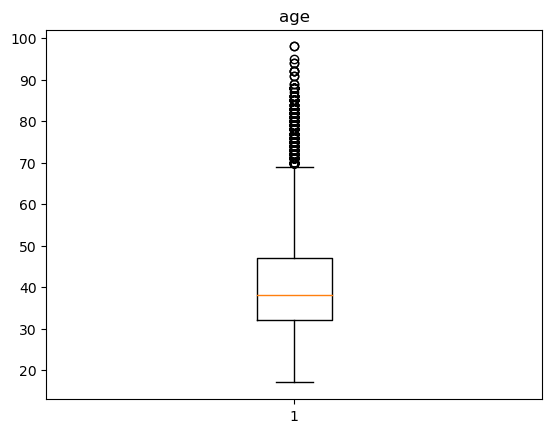

In [34]:
plt.boxplot(df["age"])
plt.title("age")
plt.show()

In [35]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

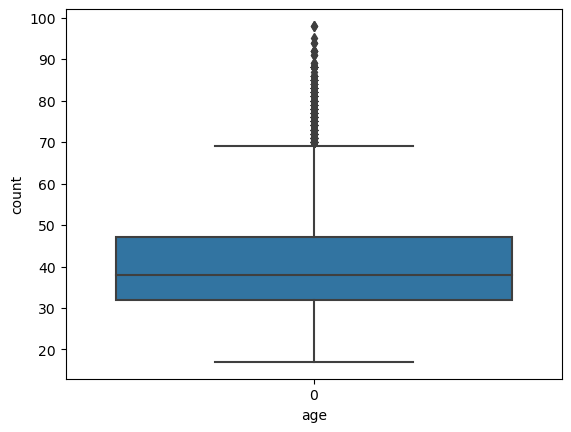

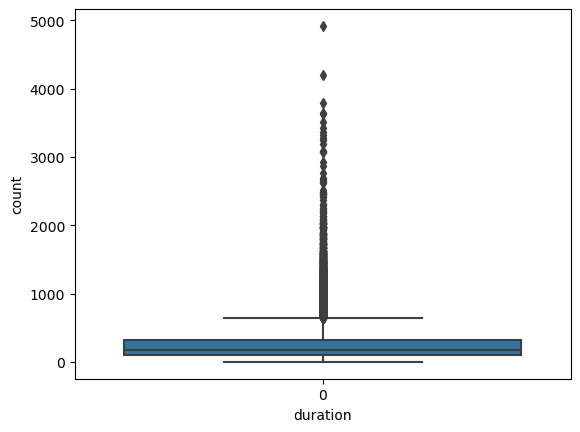

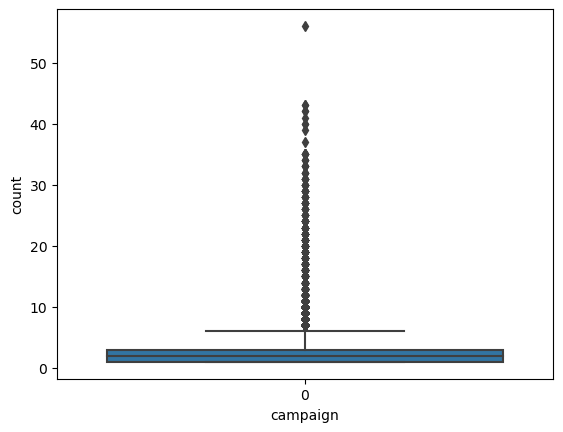

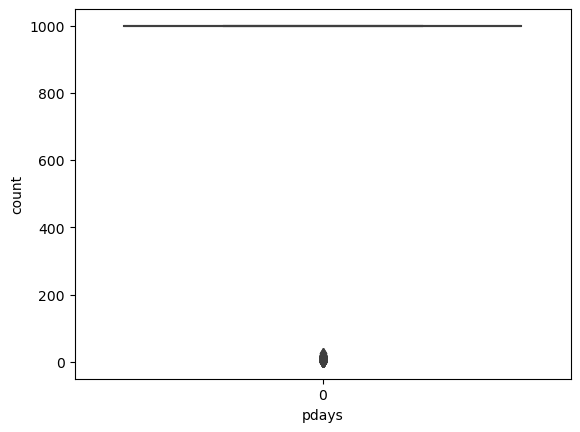

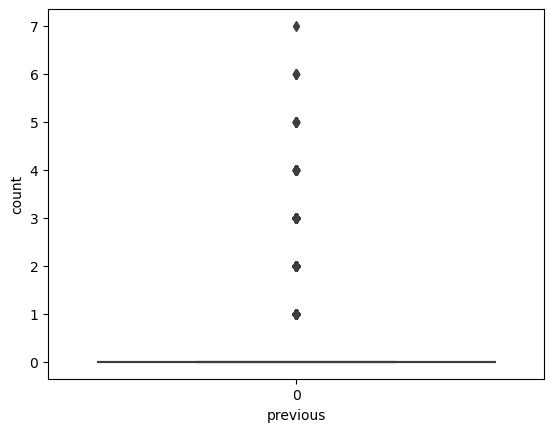

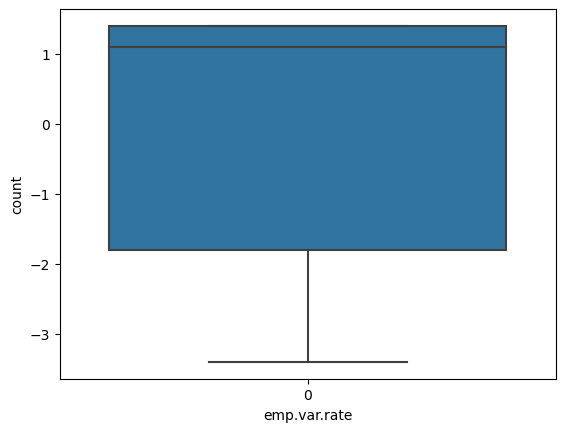

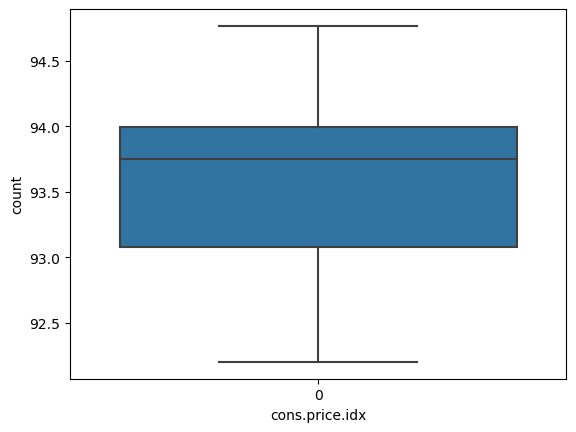

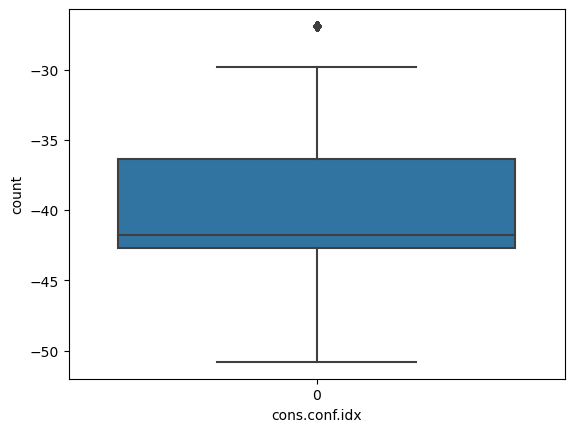

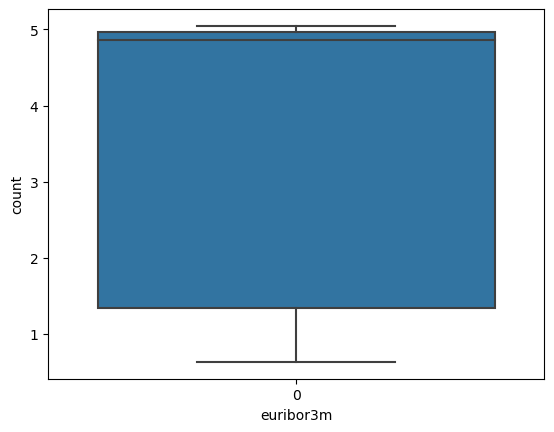

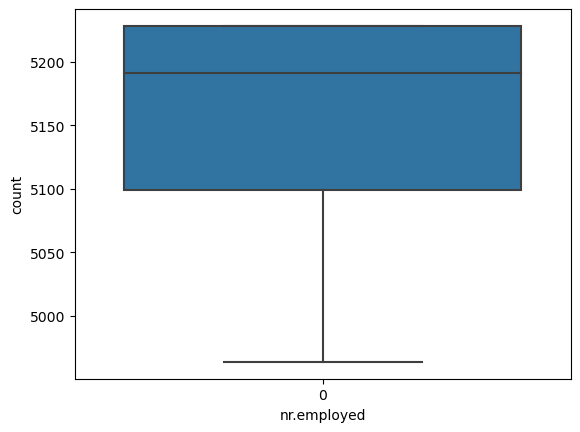

In [36]:
for col in df.columns:
  if((df[col].dtype == "int64")  or (df[col].dtype == 'float64')):
    sns.boxplot(df[col])
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()

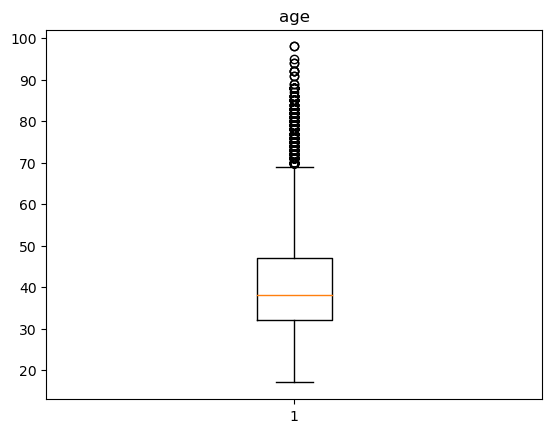

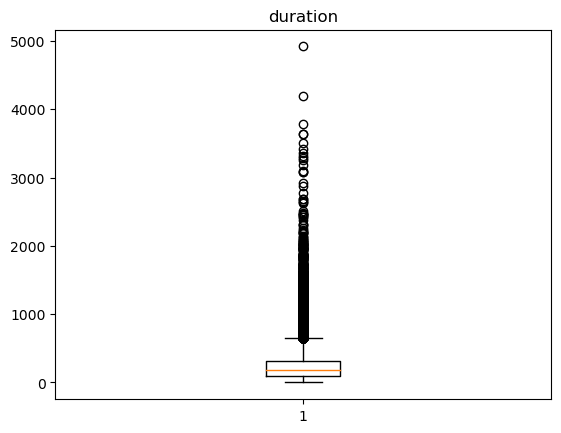

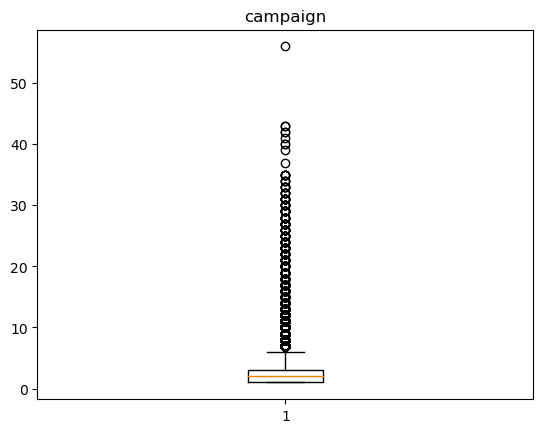

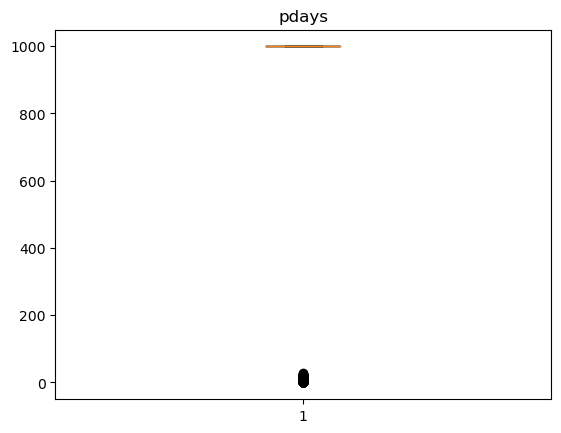

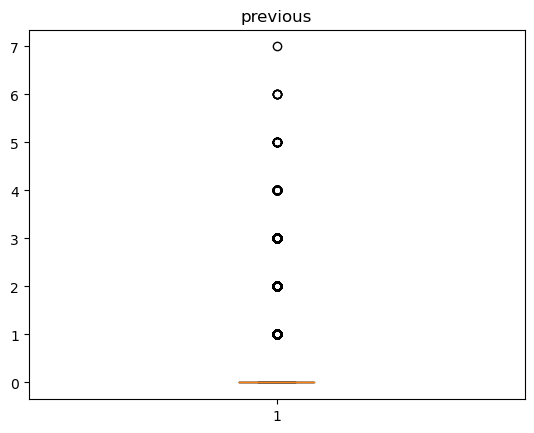

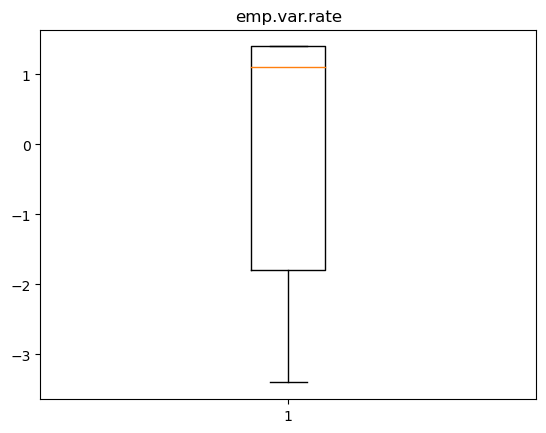

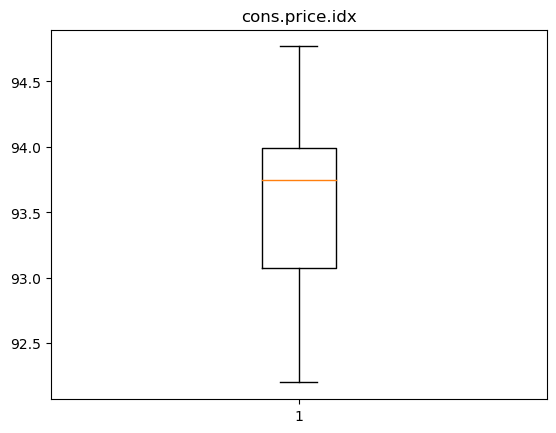

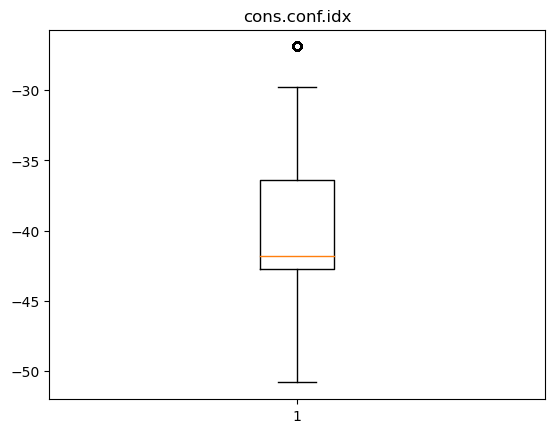

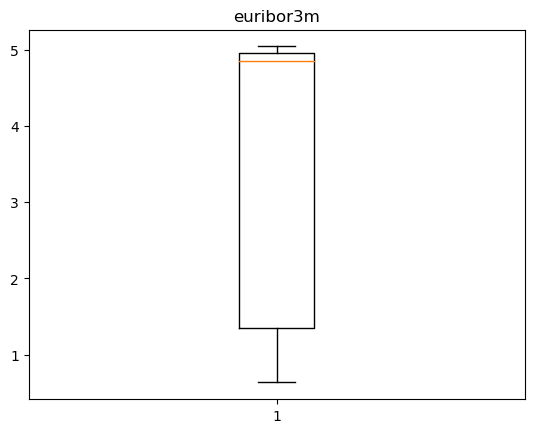

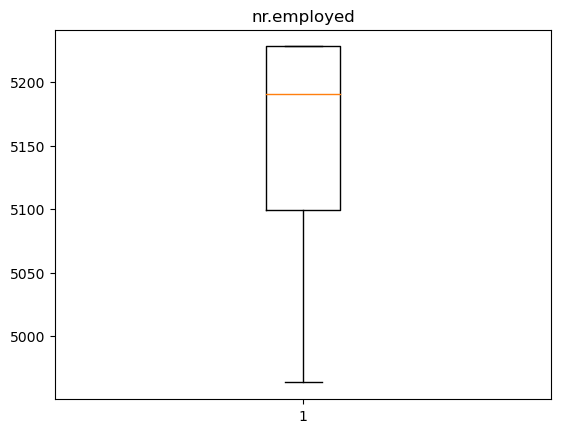

In [37]:
for col in df.columns:
    if df[col].dtype!="object":
        plt.boxplot(df[col])
        plt.title(col)
        plt.show()

In [38]:
df['pdays'].value_counts() #we cant consider this column for outliers. 
                           #becoz  most of the data is filled with one value 
                           # which shows normal data also as outliers.

pdays
999.0    39662
3.0        439
6.0        412
4.0        118
9.0         64
2.0         61
7.0         60
12.0        58
10.0        52
5.0         46
13.0        36
11.0        28
1.0         26
15.0        24
14.0        20
8.0         18
0.0         15
16.0        11
17.0         8
18.0         7
22.0         3
19.0         3
21.0         2
25.0         1
26.0         1
27.0         1
20.0         1
Name: count, dtype: int64

In [39]:
df['previous'].value_counts() #exceptional columns

previous
0.0    35551
1.0     4562
2.0      754
3.0      216
4.0       70
5.0       18
6.0        5
7.0        1
Name: count, dtype: int64

In [40]:
out_list = ['age','duration','campaign','cons.conf.idx']

In [41]:
#outlier removal
out_list

['age', 'duration', 'campaign', 'cons.conf.idx']

In [42]:
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1  #IQR is used to figure out the upper and lower limit.

In [43]:
print(Q1,Q3,IQR)

32.0 47.0 15.0


In [44]:
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR

In [45]:
print(LL,UL) #EXACT UPPER AND LOWER LIMITS OF AGE COLUMNS.

9.5 69.5


In [46]:
#IQR is used to figure out the upper and lower limit.
#we have to perform outlier analysis only once for every column.
#here we are just excluding the data not deleting the data.

for i in out_list:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)

  IQR = Q3 - Q1
  df = df[(df[i] >= Q1 - 1.5 * IQR) & (df[i] <= Q3 + 1.5 * IQR)]

In [47]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37.0,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29.0,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1.0,9.0,1.0,success,-1.1,94.767,-50.8,1.028,4963.6,no
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


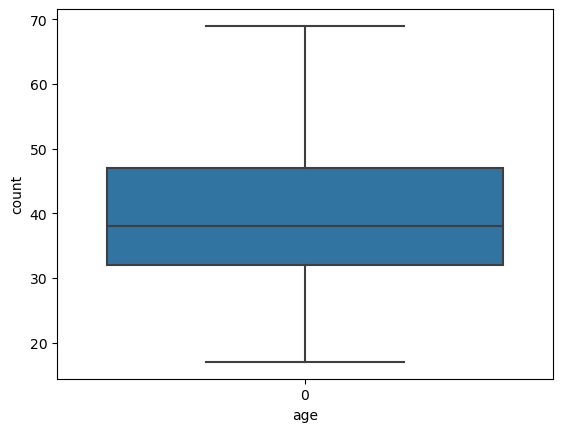

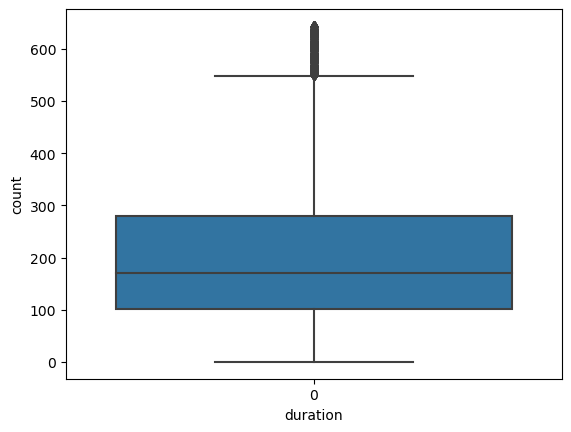

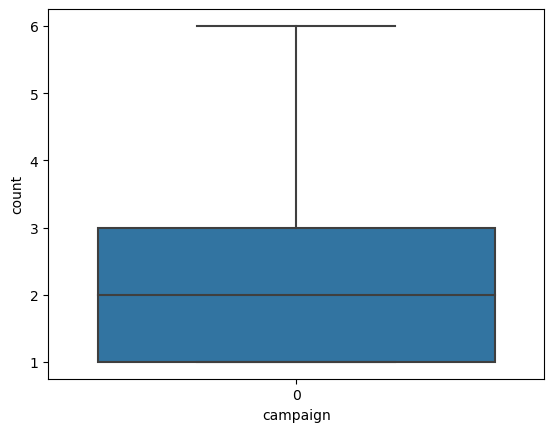

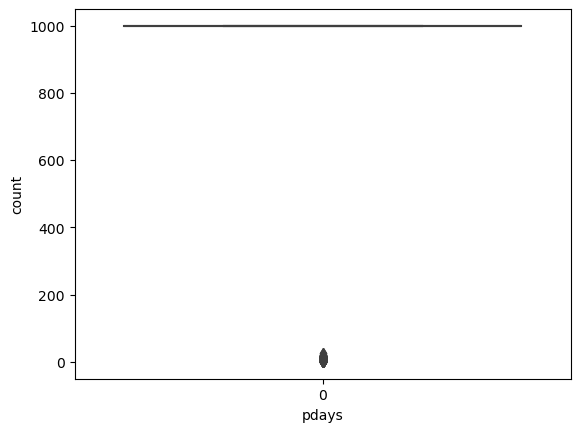

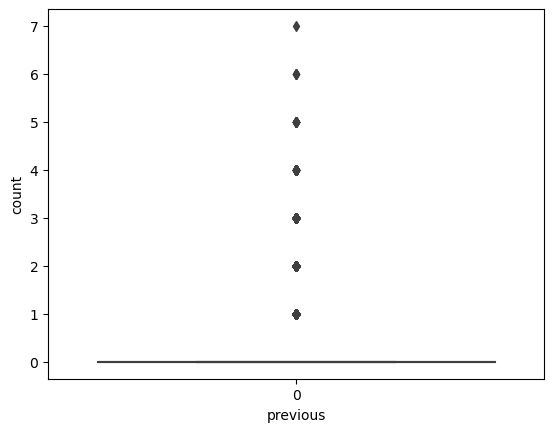

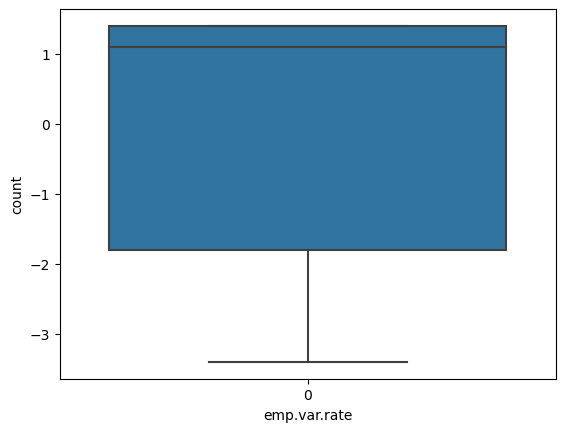

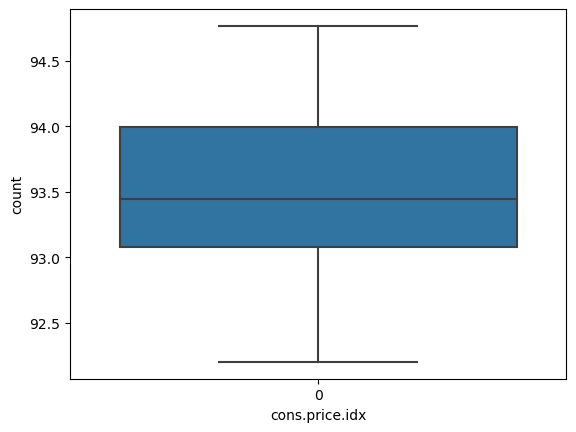

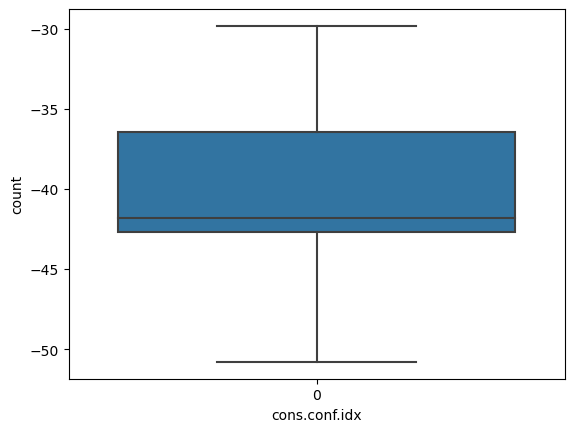

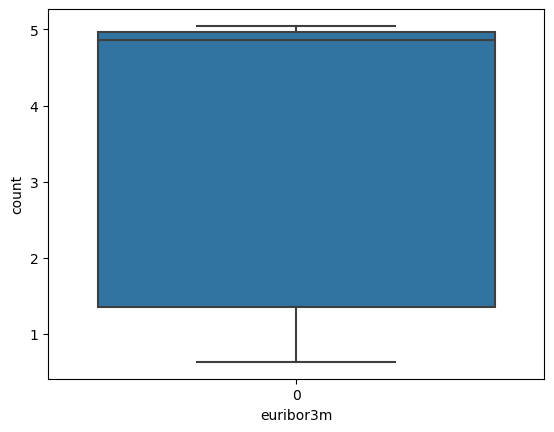

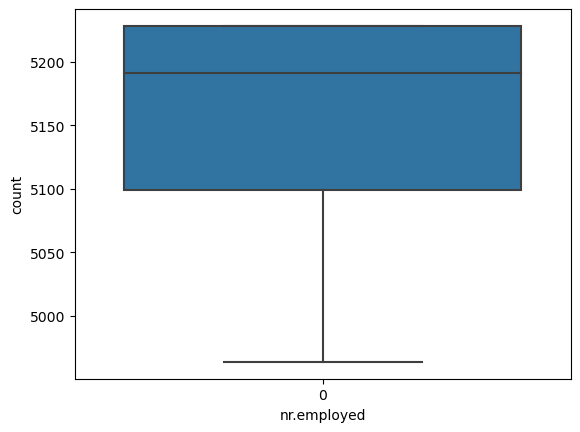

In [48]:
for col in df.columns:
  if((df[col].dtype == "int64")  or (df[col].dtype == 'float64')):
    sns.boxplot(df[col])
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()

In [49]:
#until now we have done outliers now we are going to do label and coding.


In [50]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [51]:
x.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
le = LabelEncoder()

In [54]:
for i in x.columns:
  if x[i].dtypes == 'object':
    x[i] = le.fit_transform(x[i])

In [55]:
x

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56.0,3,1,0,0,0,0,1,6,1,261.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
1,57.0,7,1,3,1,0,0,1,6,1,149.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
2,37.0,7,1,3,0,2,0,1,6,1,226.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
3,40.0,0,1,1,0,0,0,1,6,1,151.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
4,56.0,7,1,3,0,0,2,1,6,1,307.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37.0,0,1,6,0,2,0,0,7,0,281.0,1.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6
41182,29.0,10,2,0,0,2,0,0,7,0,112.0,1.0,9.0,1.0,2,-1.1,94.767,-50.8,1.028,4963.6
41184,46.0,1,1,5,0,0,0,0,7,0,383.0,1.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56.0,5,1,6,0,2,0,0,7,0,189.0,2.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6


In [56]:
#now go for feature selection
#feature selection---here we remove the colum which are not important.
#feature extraction---combines all columns into 1 or 2/we transform
#the column into 1 or 2.

In [57]:
import seaborn as sns

In [58]:
df.corr()

ValueError: could not convert string to float: 'housemaid'

In [59]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),cmap="Greens",annot=True)
#the intersection point is the relation betwn those two columns.
#we can say very good relation when we have more thean 0.7 ,0.8,0.9, 1.
# 0.2,0.3,0.4,0.5 ,0.6 says its not good relation.
#correlation is calculated for only numerical data.
#here correlation technique is not enough for feature selection becoz target col
#contains <0.7 which shows not in good relation.

ValueError: could not convert string to float: 'housemaid'

<Figure size 2000x1500 with 0 Axes>

In [60]:
#so we are going for VIF technique for feature selection.
#VIF---to check the multicolinearity.
#based on VIF values we remove columns.
#we have to remove independent features which are not 
#in good relation with target column which is done by multicolinerity 

In [71]:
cols=[]
for i in df.columns:
    if (df[i].dtype!="object")&(i!="y"):
      cols.append(i)
        

In [72]:
cols

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [73]:
x=df[cols]

In [74]:
x

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56.0,261.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0
1,57.0,149.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0
2,37.0,226.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0
3,40.0,151.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0
4,56.0,307.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41181,37.0,281.0,1.0,999.0,0.0,-1.1,94.767,-50.8,1.028,4963.6
41182,29.0,112.0,1.0,9.0,1.0,-1.1,94.767,-50.8,1.028,4963.6
41184,46.0,383.0,1.0,999.0,0.0,-1.1,94.767,-50.8,1.028,4963.6
41185,56.0,189.0,2.0,999.0,0.0,-1.1,94.767,-50.8,1.028,4963.6


In [ ]:
variance_inflation_factor

In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [98]:
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["multicolinearity"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]#to get the number of columns.

In [99]:
vif_data

,features,multicolinearity
0,age,17.004970
1,duration,3.149909
2,campaign,3.546981
3,pdays,44.025460
4,previous,1.766826
5,emp.var.rate,11.530583
6,cons.conf.idx,52.104133
7,euribor3m,59.327896


In [102]:
x.drop(["nr.employed"],axis=1,inplace=True)#axis = 1 represents column
                                           #axis= 0 represents row

KeyError: "['nr.employed'] not found in axis"

In [103]:
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["multicolinearity"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]#to get the number of columns.

In [104]:
vif_data

,features,multicolinearity
0,age,17.004970
1,duration,3.149909
2,campaign,3.546981
3,pdays,44.025460
4,previous,1.766826
5,emp.var.rate,11.530583
6,cons.conf.idx,52.104133
7,euribor3m,59.327896


In [105]:
x.drop(["cons.price.idx"],axis=1,inplace=True)

KeyError: "['cons.price.idx'] not found in axis"

In [106]:
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["multicolinearity"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]#to get the number of columns.

In [107]:
vif_data

,features,multicolinearity
0,age,17.004970
1,duration,3.149909
2,campaign,3.546981
3,pdays,44.025460
4,previous,1.766826
5,emp.var.rate,11.530583
6,cons.conf.idx,52.104133
7,euribor3m,59.327896


In [ ]:
#remove the columns which have highest vif value one by one only.

In [95]:
#now we go for model building part.

In [96]:
x

,age,duration,campaign,pdays,previous,emp.var.rate,cons.conf.idx,euribor3m
0,56.0,261.0,1.0,999.0,0.0,1.1,-36.4,4.857
1,57.0,149.0,1.0,999.0,0.0,1.1,-36.4,4.857
2,37.0,226.0,1.0,999.0,0.0,1.1,-36.4,4.857
3,40.0,151.0,1.0,999.0,0.0,1.1,-36.4,4.857
4,56.0,307.0,1.0,999.0,0.0,1.1,-36.4,4.857
...,...,...,...,...,...,...,...,...
41181,37.0,281.0,1.0,999.0,0.0,-1.1,-50.8,1.028
41182,29.0,112.0,1.0,9.0,1.0,-1.1,-50.8,1.028
41184,46.0,383.0,1.0,999.0,0.0,-1.1,-50.8,1.028
41185,56.0,189.0,2.0,999.0,0.0,-1.1,-50.8,1.028


# model implementation

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
rfe = RFE(model)

In [ ]:
rfe.fit(x,y)

In [ ]:
print(rfe.support_)

In [ ]:
print(rfe.ranking_)

In [ ]:
selected_indices  = [i for i, data in enumerate(rfe.support_)if data == True]

In [ ]:
selected_indices

In [ ]:
column_names = x.columns

In [ ]:
column_names

In [ ]:
selected_columns_names = [column_names[i] for i in selected_indices]

In [ ]:
selected_columns_names

In [ ]:
x = x.loc[:,['marital',
 'education',
 'default',
 'contact',
 'month',
 'day_of_week',
 'campaign',
 'previous',
 'cons.conf.idx',
 'euribor3m']]

In [ ]:
x

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test  = train_test_split(x,y, train_size = 0.75, random_state = 0)

In [ ]:
x_train

In [ ]:
y_train

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(x_train, y_train)

In [ ]:
y_pred  = lr.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
8062+76